## Loading and Exploring dataset

In [41]:
from google.colab import files
import pandas as pd

!wget -P DATAPATH https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/Data/Full-Economic-News-DFE-839861.csv

data = pd.read_csv("DATAPATH/Full-Economic-News-DFE-839861.csv" , encoding = "ISO-8859-1" )

--2023-06-04 03:26:10--  https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/Data/Full-Economic-News-DFE-839861.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12383529 (12M) [text/plain]
Saving to: ‘DATAPATH/Full-Economic-News-DFE-839861.csv.1’

Full-Economic-News- 100%[===================>]  11.81M  --.-KB/s    in 0.07s   

2023-06-04 03:26:10 (179 MB/s) - ‘DATAPATH/Full-Economic-News-DFE-839861.csv.1’ saved [12383529/12383529]



In [42]:
data.head(3)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/15 17:48,3.0,0.64,yes,0.64,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/15 16:54,NaN,NaN,no,1.00,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/15 1:59,NaN,NaN,no,1.00,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...


In [43]:
display(data.shape) # number of row instances and columns
data['relevance'].value_counts()/data.shape[0] # class distributions
# we notice a class imbalance, with 82% of the dataset samples tagged as new not relevant for us economy

(8000, 15)

no          0.821375
yes         0.177500
not sure    0.001125
Name: relevance, dtype: float64

In [44]:
# converting class labels into binary: 1 Yes (Relevant), 0 No (Not Relevant). Omit "Not Sure" tag
data = data[data.relevance != "not sure"] # Omitting Not Sure
data.shape
data['relevance'] = data.relevance.map({'yes': 1, 'no': 0})
data = data[["text", "relevance"]]
data.shape


(7991, 2)

In [45]:
data.head(3)

,text,relevance
0,NEW YORK -- Yields on most certificates of dep...,1
1,The Wall Street Journal Online</br></br>The Mo...,0
2,WASHINGTON -- In an effort to achieve banking ...,0


## Text Processing
For text processing, we rely on different techniques like tokenization, lowercasing, removing stop words, punctuation, and tags, vectorization. Some advanced techniques are lemmatization and stemming. 

In [70]:
#import preprocess util methods from nltk
import nltk
from nltk.corpus import stopwords

# pre-processing utils
import string

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
stop_words = set(stopwords.words('english'))

# for our custom text processing stage we are removing stopwords, punctuation, and digits
def clean(doc):
  doc = doc.replace("</br>", "")
  doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
  doc = " ".join([token for token in doc.split() if token not in stop_words])
  return doc

## Modeling

In [72]:
import sklearn
from sklearn.model_selection import train_test_split

SEED=32

# train test split
X = data.text
y = data.relevance
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7991,) (7991,)
(5993,) (5993,)
(1998,) (1998,)


In [77]:
# preprocess and vectorize train data

#import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vect = CountVectorizer(preprocessor=clean)
X_train_dtm = vect.fit_transform(X_train) # dtm stands for document-term matrix
X_test_dtm = vect.transform(X_test)

# notice that the dimension of the vectors is 13811
# 5993 and 1998 is the number of documents we are processing for train and test data
print(X_train_dtm.shape, X_test_dtm.shape)
# X_train_dtm is given in compressed sparse row format (CSR)
# (0, 15689) is the the row and column of the dtm where the presense or frequence of a term is represented, 1 means presence
print(X_train_dtm[50:51])

(5993, 65193) (1998, 65193)
  (0, 15689)	1
  (0, 43888)	2
  (0, 40695)	2
  (0, 6376)	1
  (0, 14677)	1
  (0, 46558)	2
  (0, 63050)	1
  (0, 41848)	2
  (0, 12382)	1
  (0, 19314)	1
  (0, 25176)	1
  (0, 31434)	1
  (0, 25026)	1
  (0, 33763)	2
  (0, 46662)	1
  (0, 43555)	1
  (0, 22939)	1
  (0, 28150)	1
  (0, 2639)	2
  (0, 16616)	1
  (0, 53880)	1
  (0, 19610)	1
  (0, 44431)	1
  (0, 42294)	3
  (0, 28471)	1
  :	:
  (0, 50434)	1
  (0, 33417)	1
  (0, 25704)	1
  (0, 57916)	1
  (0, 27289)	1
  (0, 39106)	1
  (0, 27977)	1
  (0, 25527)	1
  (0, 23833)	1
  (0, 36237)	1
  (0, 25196)	2
  (0, 35398)	1
  (0, 48367)	1
  (0, 40509)	1
  (0, 38294)	1
  (0, 39856)	1
  (0, 27285)	1
  (0, 23428)	1
  (0, 3424)	1
  (0, 11737)	1
  (0, 13587)	1
  (0, 60369)	1
  (0, 62621)	1
  (0, 37262)	1
  (0, 53949)	1


In [105]:
## Evaluate the classifier using various measures
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# now we can create a classifier, train it, and make predictions for test data
nb = MultinomialNB()

# %time allows to evaluate the training time with this classifier
# and understand the efficiency of the training process with this model, and then 
# compare its efficience with others
%time nb.fit(X_train_dtm, y_train)

y_pred_class = nb.predict(X_test_dtm)

CPU times: user 11.9 ms, sys: 815 µs, total: 12.7 ms
Wall time: 18.3 ms


Accuracy:  0.8003003003003003


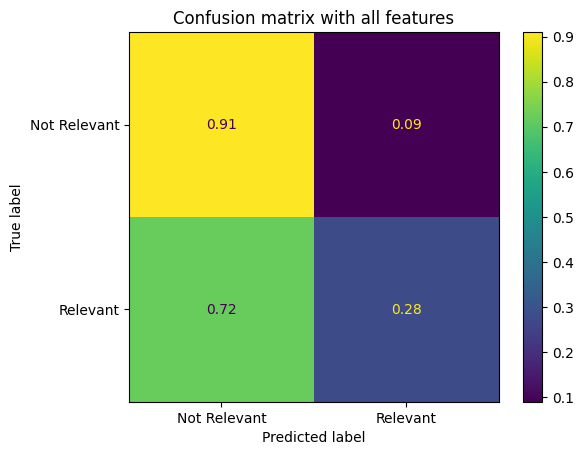

ROC_AOC_Score:  0.7422595170014721


In [107]:
from sklearn.preprocessing import normalize
import numpy as np
import itertools
import matplotlib.pyplot as plt 

print("Accuracy: ", accuracy_score(y_test, y_pred_class))

# creating the Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
normalized_cnf_matrix = np.round(cnf_matrix / cnf_matrix.sum(axis=1, keepdims=True), 2)

disp = ConfusionMatrixDisplay(confusion_matrix=normalized_cnf_matrix, display_labels=['Not Relevant','Relevant'])
disp.plot()
plt.title("Confusion matrix with all features")
plt.show()

# Calculate AUC to have an idea about the efficiency
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1] #Taking all prediction in position 1 (relevant)
print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob))
# roc_auc is widely used in analysis of binary classification models for predictive performance.
# It is robust to class imbalances
# represents the probability that a random chosen positive instance will be ranked higher than a randomly chosen negative instance by the classifier
# for this case, it evaluates the ability of the model to prioritize relevant new articles over non-relevant

In [101]:
nb.predict_proba(X_test_dtm)

array([[9.65142669e-01, 3.48573311e-02],
       [1.00000000e+00, 1.15007731e-19],
       [4.98861948e-02, 9.50113805e-01],
       ...,
       [1.00000000e+00, 2.81745990e-26],
       [1.00000000e+00, 2.81845327e-18],
       [9.99998742e-01, 1.25761421e-06]])

In [102]:
nb.predict_proba(X_test_dtm)[:, 1]


array([3.48573311e-02, 1.15007731e-19, 9.50113805e-01, ...,
       2.81745990e-26, 2.81845327e-18, 1.25761421e-06])

In [103]:
y_test

643     0
6742    0
1693    1
7968    1
3856    1
       ..
4805    0
2313    0
5443    0
1206    0
599     0
Name: relevance, Length: 1998, dtype: int64

In [54]:
a = np.array([1,2,3])
print(a)
print(a[:, np.newaxis])
print(a[np.newaxis,:])
print(cnf_matrix.max())
print(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1]))
# for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
#   print("asasd")
set(itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])))

[1 2 3]
[[1]
 [2]
 [3]]
[[1 2 3]]
1646
range(0, 2) range(0, 2)


{(0, 0), (0, 1), (1, 0), (1, 1)}

In [55]:
a = 'sdfdf\nfasdsfa'
a.splitlines()
a.isdigit()

False

In [56]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
type(X_train)

pandas.core.series.Series